In [5]:
from mario_gpt import MarioLM
import torch
device = torch.device('cuda')

lm_path = "EdwardSJ151/MarioGPT2-V2"
tokenizer_path = "shyamsn97/Mario-GPT2-700-context-length"

mario_lm = MarioLM(lm_path=lm_path, tokenizer_path=tokenizer_path)
mario_lm = mario_lm.to(device)

prompts = ['some pipes, some enemies, many blocks, many goombas, little koopas, little coins, little powerups, low elevation']

generated_level = mario_lm.sample(
    prompts=prompts,
    num_steps=1400,
    temperature=2.0,
    use_tqdm=True
)


Using EdwardSJ151/MarioGPT2-V2 lm


/opt/conda/lib/python3.10/site-packages/transformers-4.46.3-py3.10.egg/transformers/models/auto/modeling_auto.py:1833: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


Using shyamsn97/Mario-GPT2-700-context-length tokenizer


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
shape: torch.Size([1, 672]), torch.Size([1, 1401]) first: 56, last: 13: 100% 1400/1400 [00:31<00:00, 44.25it/s]
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [6]:
print(generated_level)

SampleOutput(level=['SSSSSSS---------------------------SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS-------------------SSSSSS', 'SSSSSSS---------------------------SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS-------------------SSSSSS', '----------------------------------------------------------------------------------------------------', '-------------------------------------------------------------------------------------g--------------', '-----------------------------------------------------------------------------------S!S--------------', '----------------------------------------------------------------------------------------------------', '---S------------------------------------------------------------------------------------------------', 'S!SS-----------------?------------------------------------------------------------------------------', '--------------------------------------------K-----------------------------------S!S---S?S----------R', '-------------SS---------------------------K

In [7]:
# show string list
generated_level.level

['SSSSSSS---------------------------SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS-------------------SSSSSS',
 'SSSSSSS---------------------------SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS-------------------SSSSSS',
 '----------------------------------------------------------------------------------------------------',
 '-------------------------------------------------------------------------------------g--------------',
 '-----------------------------------------------------------------------------------S!S--------------',
 '----------------------------------------------------------------------------------------------------',
 '---S------------------------------------------------------------------------------------------------',
 'S!SS-----------------?------------------------------------------------------------------------------',
 '--------------------------------------------K-----------------------------------S!S---S?S----------R',
 '-------------SS---------------------------K----------

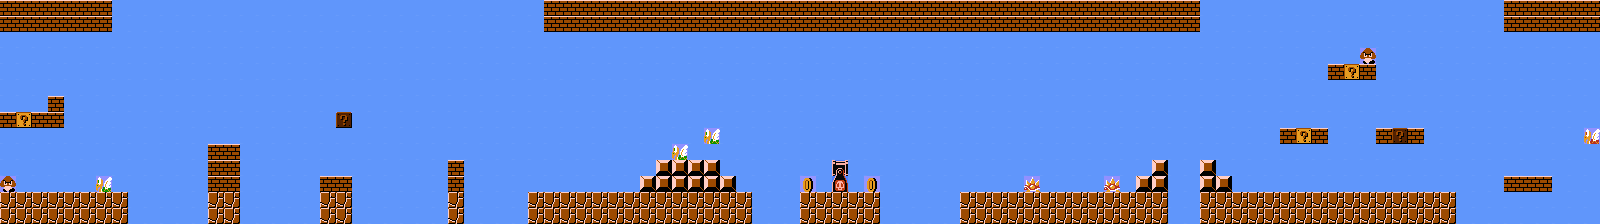

In [8]:
# show PIL image
generated_level.img

In [4]:
generated_level.prompt

'some pipes, some enemies, many blocks, many goombas, little koopas, little coins, little powerups, low elevation'

In [46]:
# Create a prompt maker
import random

class RandomPromptCreator:
    def __init__(self):
        self.pipe_options = ["no", "little", "some", "many"]
        self.enemy_options = ["no", "little", "some", "many"]
        self.block_options = ["little", "some", "many"]  # Levels always have blocks
        self.coin_options = ["no", "little", "some", "many"]
        self.powerup_options = ["no", "little", "some", "many"]
        self.goomba_options = ["no", "little", "some", "many"]
        self.koopa_options = ["no", "little", "some", "many"]
        self.elevation_options = ["low", "high"]

    def random_pipe_prompt(self) -> str:
        return random.choice(self.pipe_options) + " pipes"

    def random_enemy_prompt(self) -> str:
        return random.choice(self.enemy_options) + " enemies"

    def random_block_prompt(self) -> str:
        return random.choice(self.block_options) + " blocks"

    def random_coin_prompt(self) -> str:
        return random.choice(self.coin_options) + " coins"

    def random_powerup_prompt(self) -> str:
        return random.choice(self.powerup_options) + " powerups"

    def random_goomba_prompt(self) -> str:
        return random.choice(self.goomba_options) + " goombas"

    def random_koopa_prompt(self) -> str:
        return random.choice(self.koopa_options) + " koopas"

    def random_elevation_prompt(self) -> str:
        return random.choice(self.elevation_options) + " elevation"

    def create_random_prompt(self) -> str:
        components = []

        # Randomly decide whether to include each feature
        if random.choice([True, False]):
            components.append(self.random_pipe_prompt())
        if random.choice([True, False]):
            components.append(self.random_enemy_prompt())
        if random.choice([True, False]):
            components.append(self.random_block_prompt())
        if random.choice([True, False]):
            components.append(self.random_coin_prompt())
        if random.choice([True, False]):
            components.append(self.random_powerup_prompt())
        if random.choice([True, False]):
            components.append(self.random_goomba_prompt())
        if random.choice([True, False]):
            components.append(self.random_koopa_prompt())
        if random.choice([True, False]):
            components.append(self.random_elevation_prompt())

        # Ensure at least one feature is included
        while not components:
            components.append(self.random_pipe_prompt())

        return ", ".join(components)


# Example usage
random_prompter = RandomPromptCreator()
prompt = random_prompter.create_random_prompt()
print(prompt)

no powerups, many goombas


In [ ]:
import csv
import os

# File name for the CSV
csv_filename = "generated_levels.csv"

# Function to check if a prompt already exists in the CSV
def prompt_exists_in_csv(prompt, filename):
    if not os.path.exists(filename):
        return False
    with open(filename, mode='r', newline='', encoding='utf-8') as file:
        reader = csv.DictReader(file)
        for row in reader:
            if row['prompt'] == prompt:
                return True
    return False

# Generate and append levels to the CSV
def generate_and_append_levels(num_levels):
    # Open the CSV in append mode
    with open(csv_filename, mode='a', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=["prompt", "level", "real_prompt"])

        # Write the header if the file is empty
        if os.stat(csv_filename).st_size == 0:
            writer.writeheader()

        for _ in range(num_levels):
            # Generate a unique prompt
            prompt = random_prompter.create_random_prompt()

            while prompt_exists_in_csv(prompt, csv_filename):
                prompt = random_prompter.create_random_prompt()

            # Generate a level based on the prompt
            generated_level = mario_lm.sample(
                prompts=[prompt], 
                num_steps=1400,
                temperature=2.8,
                use_tqdm=True
            )

            # Append the new level and prompt to the CSV
            writer.writerow({
                "prompt": prompt,
                "level": generated_level.level,
                "real_prompt": generated_level.prompt
            })

    print(f"Generated levels and prompts appended to {csv_filename}")

# Call the function to generate and append levels
generate_and_append_levels(1000)

In [ ]:
# Choose 250 and apply A* on them

In [ ]:
!pip -q install pandas

In [48]:
import pandas as pd

# Load the CSV file
data = pd.read_csv("generated_levels.csv")

# Define a function to parse prompts into components
def parse_prompt(prompt):
    if not isinstance(prompt, str):
        return {}
    components = [x.strip() for x in prompt.split(',')]
    parsed = {}
    
    # Define possible keys in the expected order
    keys = ['pipes', 'enemies', 'blocks', 'goombas', 'koopas', 'coins', 'powerups', 'elevation']
    
    # Map components to keys (if they exist)
    for i, component in enumerate(components):
        if i < len(keys):
            parsed[keys[i]] = component
    return parsed

# Parse both the prompt and real_prompt columns
data['parsed_prompt'] = data['prompt'].apply(parse_prompt)
data['parsed_real_prompt'] = data['real_prompt'].apply(parse_prompt)

# Get all unique keys across parsed prompts and real prompts
all_keys = ['pipes', 'enemies', 'blocks', 'goombas', 'koopas', 'coins', 'powerups', 'elevation']

# Initialize accuracy counters for all components
accuracy = {key: 0 for key in all_keys}

# Define a comparison function
def compare_components(row):
    result = {key: 1 for key in all_keys}  # Default to 1 (100% accurate) for all keys
    for key in all_keys:
        # If the component is explicitly mentioned in parsed_prompt, compare it with parsed_real_prompt
        if key in row['parsed_prompt']:
            if row['parsed_prompt'][key] != row['parsed_real_prompt'].get(key):
                result[key] = 0  # Mark as inaccurate if values do not match
    return result

# Apply the comparison to each row and calculate accuracy per row
data['comparison_results'] = data.apply(compare_components, axis=1)

# Aggregate accuracy for all components
for key in all_keys:
    accuracy[key] = data['comparison_results'].apply(lambda x: x[key]).sum()

# Calculate accuracy percentages
accuracy_percentage = {key: (accuracy[key] / len(data)) * 100 for key in all_keys}

# Create a DataFrame for the results
accuracy_df = pd.DataFrame(
    list(accuracy_percentage.items()),
    columns=['Component', 'Accuracy (%)']
)

# Display the results
print(accuracy_df)


   Component  Accuracy (%)
0      pipes          13.6
1    enemies           9.6
2     blocks          17.0
3    goombas          35.2
4     koopas          62.8
5      coins          83.4
6   powerups          96.0
7  elevation          99.8


In [35]:
import numpy as np  # Import numpy for creating a range of temperatures
import os  # For creating directories
from PIL import Image  # Import Pillow for saving images
import csv  # For saving data to a CSV file

# Compare level with different temperatures

data = []

csv_filename = "temperature_levels.csv"
image_directory = "generated_images"  # Directory to save images
os.makedirs(image_directory, exist_ok=True)  # Create directory if it doesn't exist

prompt = ['some pipes, some enemies, many blocks, many goombas, little koopas, little coins, little powerups, low elevation']

# Generate a range of temperatures from 1.0 to 2.8 in 5 equal steps
temperatures = np.linspace(2.0, 4.0, 5)

num_samples_per_temperature = 5  # Number of levels to generate for each temperature

# Loop to generate multiple levels for each temperature
for i, temp in enumerate(temperatures):
    for j in range(num_samples_per_temperature):
        print(f"Generating level {j+1} for temperature {temp} (Temperature index: {i+1})")
        
        # Generate a level based on the prompt with varying temperature
        generated_level = mario_lm.sample(
            prompts=prompt, 
            num_steps=1400,
            temperature=temp,  # Use dynamic temperature for each iteration
            use_tqdm=True
        )
        
        # Save the image
        image_path = os.path.join(image_directory, f"level_temp_{i+1}_sample_{j+1}.png")
        generated_level.img.save(image_path)  # Use Pillow's save() method
        print(f"Saved image to {image_path}")
        
        # Append data for CSV
        data.append({
            "prompt": prompt, 
            "level": generated_level.level, 
            "level_prompt": generated_level.prompt,
            "temperature": temp,  # Add temperature to the data
            "image_path": image_path  # Add image path to the CSV data
        })

# Save data to a CSV file
with open(csv_filename, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=["prompt", "level", "level_prompt", "temperature", "image_path"])
    writer.writeheader()
    writer.writerows(data)

print(f"Generated levels and prompts saved to {csv_filename}")


Generating level 1 for temperature 2.0 (Temperature index: 1)


shape: torch.Size([1, 672]), torch.Size([1, 1401]) first: 13, last: 13: 100% 1400/1400 [00:31<00:00, 44.44it/s]


Saved image to generated_images/level_temp_1_sample_1.png
Generating level 2 for temperature 2.0 (Temperature index: 1)


shape: torch.Size([1, 672]), torch.Size([1, 1401]) first: 56, last: 13: 100% 1400/1400 [00:31<00:00, 44.35it/s]


Saved image to generated_images/level_temp_1_sample_2.png
Generating level 3 for temperature 2.0 (Temperature index: 1)


shape: torch.Size([1, 672]), torch.Size([1, 1401]) first: 56, last: 56: 100% 1400/1400 [00:31<00:00, 44.27it/s]


Saved image to generated_images/level_temp_1_sample_3.png
Generating level 4 for temperature 2.0 (Temperature index: 1)


shape: torch.Size([1, 672]), torch.Size([1, 1401]) first: 56, last: 56: 100% 1400/1400 [00:32<00:00, 43.68it/s]


Saved image to generated_images/level_temp_1_sample_4.png
Generating level 5 for temperature 2.0 (Temperature index: 1)


shape: torch.Size([1, 672]), torch.Size([1, 1401]) first: 56, last: 13: 100% 1400/1400 [00:32<00:00, 43.59it/s]


Saved image to generated_images/level_temp_1_sample_5.png
Generating level 1 for temperature 2.5 (Temperature index: 2)


shape: torch.Size([1, 672]), torch.Size([1, 1401]) first: 13, last: 56: 100% 1400/1400 [00:31<00:00, 44.32it/s]


Saved image to generated_images/level_temp_2_sample_1.png
Generating level 2 for temperature 2.5 (Temperature index: 2)


shape: torch.Size([1, 672]), torch.Size([1, 1401]) first: 13, last: 56: 100% 1400/1400 [00:31<00:00, 44.59it/s]


Saved image to generated_images/level_temp_2_sample_2.png
Generating level 3 for temperature 2.5 (Temperature index: 2)


shape: torch.Size([1, 672]), torch.Size([1, 1401]) first: 13, last: 56: 100% 1400/1400 [00:31<00:00, 44.34it/s]


Saved image to generated_images/level_temp_2_sample_3.png
Generating level 4 for temperature 2.5 (Temperature index: 2)


shape: torch.Size([1, 672]), torch.Size([1, 1401]) first: 56, last: 56: 100% 1400/1400 [00:31<00:00, 44.32it/s]


Saved image to generated_images/level_temp_2_sample_4.png
Generating level 5 for temperature 2.5 (Temperature index: 2)


shape: torch.Size([1, 672]), torch.Size([1, 1401]) first: 13, last: 13: 100% 1400/1400 [00:31<00:00, 44.33it/s]


Saved image to generated_images/level_temp_2_sample_5.png
Generating level 1 for temperature 3.0 (Temperature index: 3)


shape: torch.Size([1, 672]), torch.Size([1, 1401]) first: 56, last: 13: 100% 1400/1400 [00:31<00:00, 44.05it/s]


Saved image to generated_images/level_temp_3_sample_1.png
Generating level 2 for temperature 3.0 (Temperature index: 3)


shape: torch.Size([1, 672]), torch.Size([1, 1401]) first: 13, last: 56: 100% 1400/1400 [00:32<00:00, 43.63it/s]


Saved image to generated_images/level_temp_3_sample_2.png
Generating level 3 for temperature 3.0 (Temperature index: 3)


shape: torch.Size([1, 672]), torch.Size([1, 1401]) first: 56, last: 56: 100% 1400/1400 [00:31<00:00, 44.03it/s]


Saved image to generated_images/level_temp_3_sample_3.png
Generating level 4 for temperature 3.0 (Temperature index: 3)


shape: torch.Size([1, 672]), torch.Size([1, 1401]) first: 13, last: 13: 100% 1400/1400 [00:31<00:00, 43.88it/s]


Saved image to generated_images/level_temp_3_sample_4.png
Generating level 5 for temperature 3.0 (Temperature index: 3)


shape: torch.Size([1, 672]), torch.Size([1, 1401]) first: 56, last: 56: 100% 1400/1400 [00:31<00:00, 44.38it/s]


Saved image to generated_images/level_temp_3_sample_5.png
Generating level 1 for temperature 3.5 (Temperature index: 4)


shape: torch.Size([1, 672]), torch.Size([1, 1401]) first: 13, last: 13: 100% 1400/1400 [00:31<00:00, 44.16it/s]


Saved image to generated_images/level_temp_4_sample_1.png
Generating level 2 for temperature 3.5 (Temperature index: 4)


shape: torch.Size([1, 672]), torch.Size([1, 1401]) first: 56, last: 56: 100% 1400/1400 [00:32<00:00, 43.69it/s]


REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x76EB29FCEFB0> (62, 4)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x76EB29FCEFB0> (70, 4)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x76EB29D3DBA0> (62, 5)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x76EB29D3DBA0> (70, 5)
Saved image to generated_images/level_temp_4_sample_2.png
Generating level 3 for temperature 3.5 (Temperature index: 4)


shape: torch.Size([1, 672]), torch.Size([1, 1401]) first: 56, last: 56: 100% 1400/1400 [00:31<00:00, 44.30it/s]


REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x76EB29FCFF10> (0, 9)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x76EB29D3F8B0> (0, 10)
Saved image to generated_images/level_temp_4_sample_3.png
Generating level 4 for temperature 3.5 (Temperature index: 4)


shape: torch.Size([1, 672]), torch.Size([1, 1401]) first: 56, last: 56: 100% 1400/1400 [00:31<00:00, 44.42it/s]


REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x76EB29DB1D20> (4, 8)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x76EB29D3CB50> (4, 9)
Saved image to generated_images/level_temp_4_sample_4.png
Generating level 5 for temperature 3.5 (Temperature index: 4)


shape: torch.Size([1, 672]), torch.Size([1, 1401]) first: 56, last: 13: 100% 1400/1400 [00:31<00:00, 44.60it/s]


Saved image to generated_images/level_temp_4_sample_5.png
Generating level 1 for temperature 4.0 (Temperature index: 5)


shape: torch.Size([1, 672]), torch.Size([1, 1401]) first: 56, last: 13: 100% 1400/1400 [00:31<00:00, 44.45it/s]


Saved image to generated_images/level_temp_5_sample_1.png
Generating level 2 for temperature 4.0 (Temperature index: 5)


shape: torch.Size([1, 672]), torch.Size([1, 1401]) first: 56, last: 13: 100% 1400/1400 [00:31<00:00, 44.41it/s]  


Saved image to generated_images/level_temp_5_sample_2.png
Generating level 3 for temperature 4.0 (Temperature index: 5)


shape: torch.Size([1, 672]), torch.Size([1, 1401]) first: 56, last: 56: 100% 1400/1400 [00:31<00:00, 44.34it/s]


REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x76EB29D3EC80> (0, 9)
REPLACING <PIL.PngImagePlugin.PngImageFile image mode=RGB size=16x16 at 0x76EB29D3FFD0> (0, 10)
Saved image to generated_images/level_temp_5_sample_3.png
Generating level 4 for temperature 4.0 (Temperature index: 5)


shape: torch.Size([1, 672]), torch.Size([1, 1401]) first: 56, last: 56: 100% 1400/1400 [00:31<00:00, 44.24it/s]


Saved image to generated_images/level_temp_5_sample_4.png
Generating level 5 for temperature 4.0 (Temperature index: 5)


shape: torch.Size([1, 672]), torch.Size([1, 1401]) first: 56, last: 13: 100% 1400/1400 [00:31<00:00, 44.00it/s]


Saved image to generated_images/level_temp_5_sample_5.png
Generated levels and prompts saved to temperature_levels.csv


In [33]:
!pip -q install pandas

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [36]:
import numpy as np
import pandas as pd
import ast  # To safely evaluate string representations of lists
from mario_gpt.level import FULL_LEVEL_STR_WITH_PATHS
from mario_gpt.utils import convert_level_to_png

# Load the CSV file
temperature_levels = pd.read_csv("temperature_levels.csv")

# Define the tiles directory (update this path to where your tile images are stored)
tiles_dir = "./mario_gpt/data/tiles"

# Iterate through the levels in the "level" column
for index, level in enumerate(temperature_levels['level']):
    # Parse the string representation of the list into a Python list
    a_list = ast.literal_eval(level)
    
    # Convert the list into rows of characters
    a_rows = [list(row) for row in a_list]
    big_rows = [list(row) for row in FULL_LEVEL_STR_WITH_PATHS.strip().split("\n")]

    # Dimensions of the small string
    a_height = len(a_rows)
    a_width = len(a_rows[0])

    # Dimensions of the big string
    big_height = len(big_rows)
    big_width = len(big_rows[0])

    # Function to calculate similarity between two grids
    def similarity(grid1, grid2):
        matches = sum(1 for r1, r2 in zip(grid1, grid2) for c1, c2 in zip(r1, r2) if c1 == c2)
        return matches

    # Sliding window search
    best_match = None
    best_score = -1
    best_coords = None

    for i in range(big_height - a_height + 1):
        for j in range(big_width - a_width + 1):
            # Extract the current window
            window = [big_rows[i + k][j:j + a_width] for k in range(a_height)]
            # Compute similarity
            score = similarity(a_rows, window)
            if score > best_score:
                best_score = score
                best_match = window
                best_coords = (i, j)

    # Format the best match for visualization
    best_match_str = "\n".join("".join(row) for row in best_match)

    # Convert the best match to a PNG
    png_image, _, _ = convert_level_to_png(
        level=best_match_str.split("\n"),  # Pass the level as a list of strings
        tiles_dir=tiles_dir,
        target_size=None  # You can specify a target size if needed
    )
    
    # Save the PNG to a file
    png_image.save(f"level_matches/best_match_level_{index + 1}.png")
    
    # Print results for each level
    print(f"Level {index + 1}:")
    print(f"Best Match String:\n{best_match_str}")
    print(f"Best Score: {best_score}")
    print(f"Best Coordinates: {best_coords}\n")
    print(f"Saved as: best_match_level_{index + 1}.png\n")


Level 1:
Best Match String:
----------------------------------------------------------------------------------------------------
##SSSUSUSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS----SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS-----SSSSSSSSSSSSSSSS--
##-------------------------------------------SSSS---------------------------------SSSS--------------
---------------------------------------------SSSS---------------------------------SSSS--------------
---------------------------------------------SSSS---------------------------------SSSS--------------
----------------------------------------------------()----------------------------------------------
----------------------------------------------------[]----------------------------------------------
--#####---------------------------SSS---------------[]-----------()---------------------------------
-######-------------------SSS-----------------()---SSSS----------[]---------------SCSS---------SSS--
#######-----------SSS-------------------------[]--------()-----

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Level 4:
Best Match String:
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------gg-------------------------
SSSSSS-------------------SSSSSSS-------!!?------------!!!!!!!---------SSSSSSSSS----------------#----
---------------------------------------------------------------------------------------------g-#----
--------()-----------------------------------------------k----------------------------------##-#----
SS------[]-----------------------------SSS------------SSSSSSS-------------------------------##-#----
-------!!!!!!------------S2S2S2S---------------()--------------k-------K-----()-------()----##-#----
-----------------------------------------------[]-------#------